In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import math
import statsmodels.formula.api as smf

from sklearn.metrics import r2_score
from pprint import pprint
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split

# data preprocessing

In [135]:
traind = pd.read_csv('train.csv')
traind.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [136]:
traind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [137]:
traind.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [94]:
traind.shape

(1117957, 22)

# Data Visualization

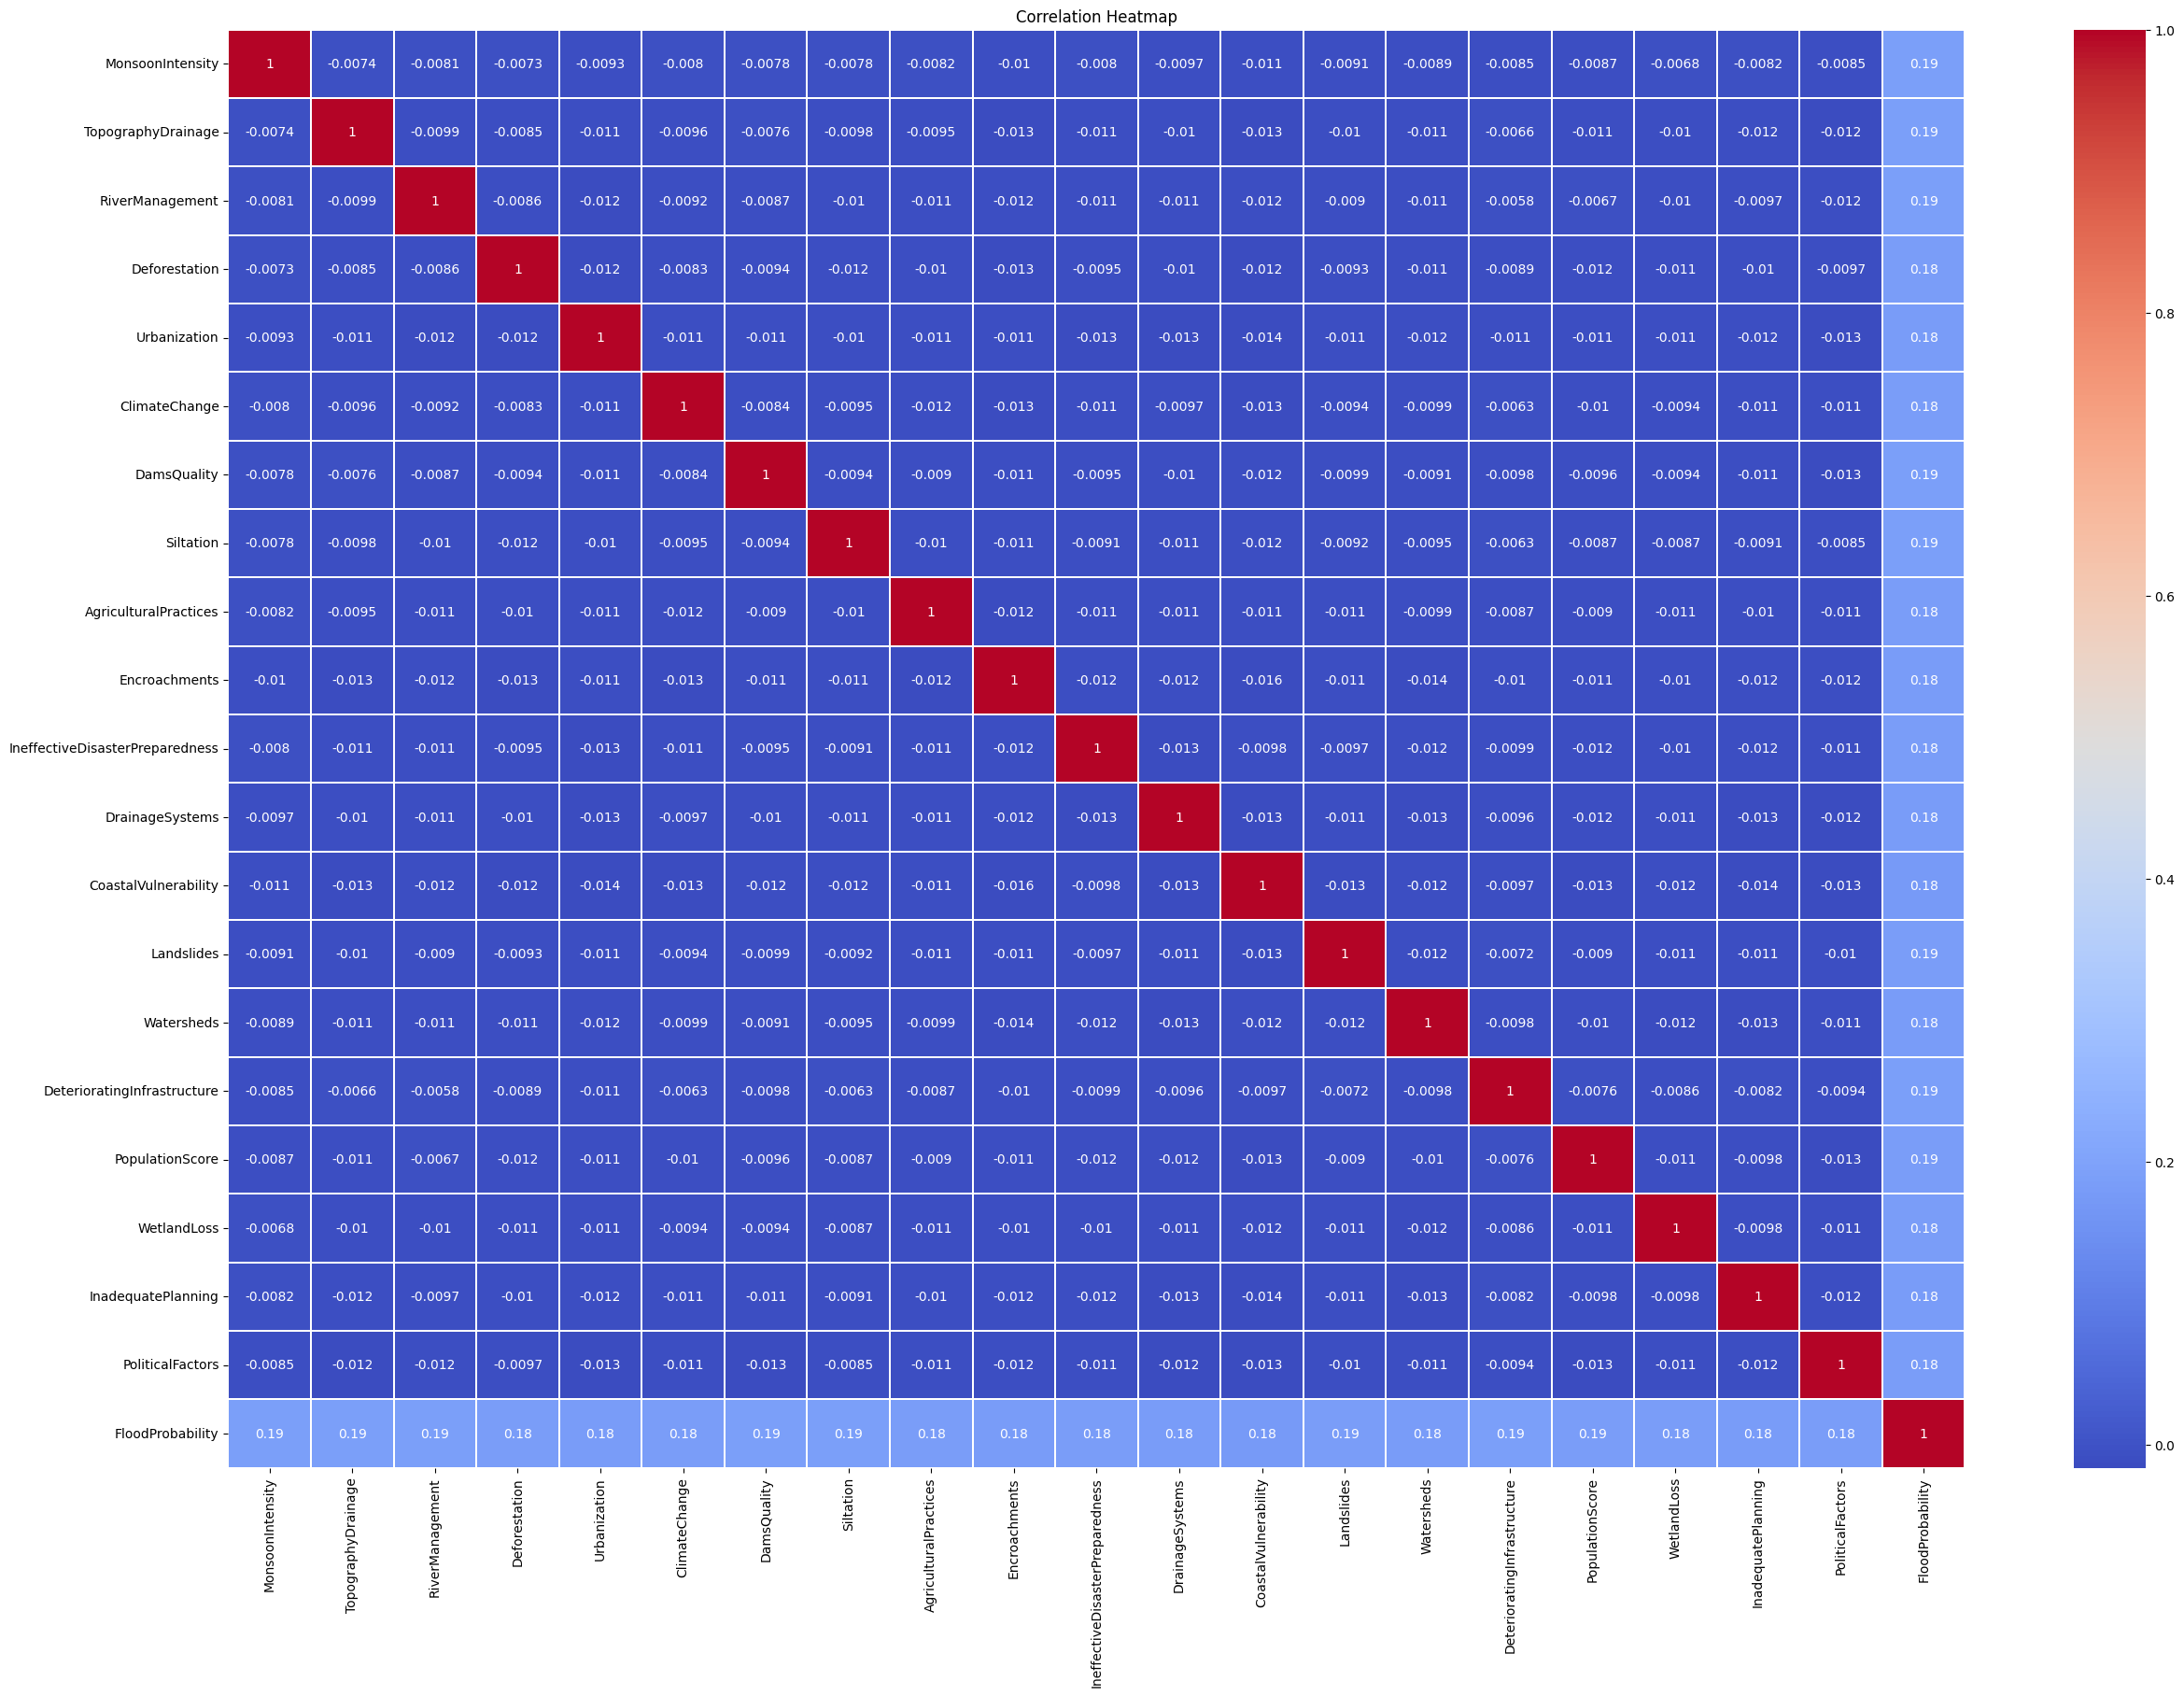

In [95]:
plt.figure(figsize=(30,20))
corr = traind.drop('id',axis=1).corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.3)
plt.title('Correlation Heatmap')
plt.show()

# EXP

In [153]:
df = traind[['PoliticalFactors', 'FloodProbability', 'Deforestation']].dropna()

X = df[['PoliticalFactors']].values.reshape(-1, 1)
y = df['FloodProbability'].values

lr = LinearRegression().fit(X, y)
r2 = lr.score(X, y)

<Axes: xlabel='PoliticalFactors', ylabel='FloodProbability'>

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



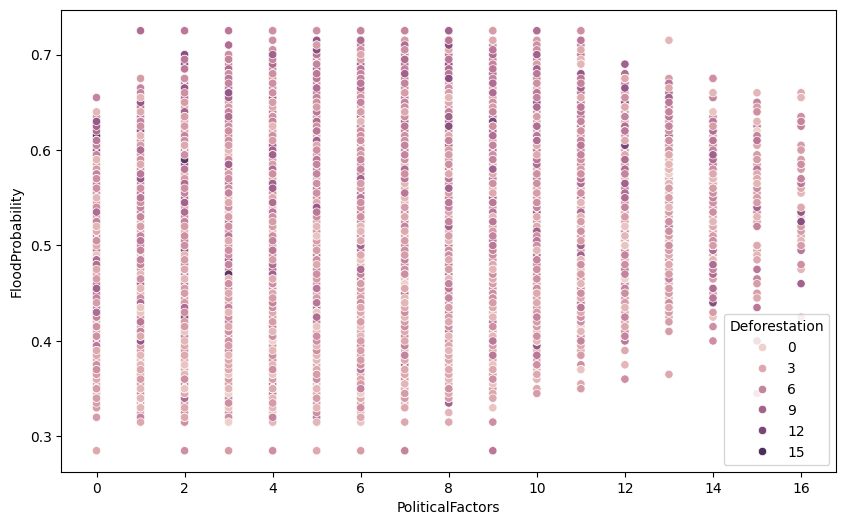

In [154]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PoliticalFactors', y='FloodProbability', hue='Deforestation')

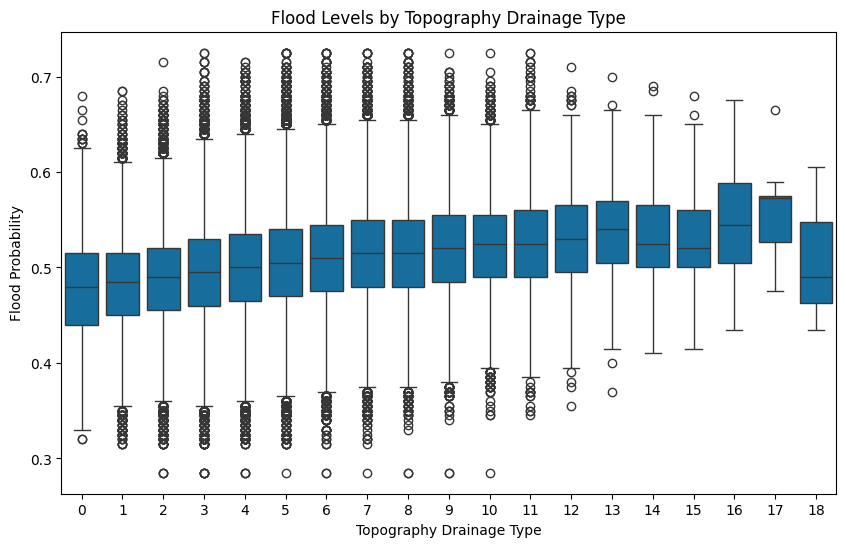

In [155]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=traind, x='TopographyDrainage', y='FloodProbability')
plt.title('Flood Levels by Topography Drainage Type')
plt.xlabel('Topography Drainage Type')
plt.ylabel('Flood Probability')
plt.show()

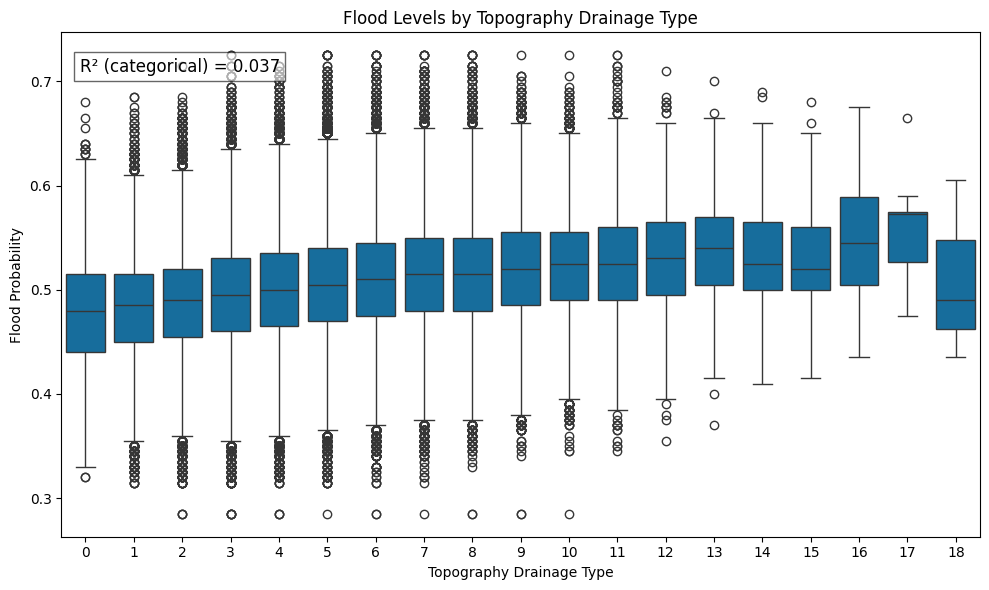

In [159]:
df2 = traind[['TopographyDrainage', 'FloodProbability']].dropna()

model = smf.ols('FloodProbability ~ C(TopographyDrainage)', data=df2).fit()
r2 = model.rsquared

plt.figure(figsize=(10, 6))
sns.boxplot(data=df2, x='TopographyDrainage', y='FloodProbability')
plt.title('Flood Levels by Topography Drainage Type')
plt.xlabel('Topography Drainage Type')
plt.ylabel('Flood Probability')

plt.gca().text(0.02, 0.95, f'R² (categorical) = {r2:.3f}', transform=plt.gca().transAxes,
               fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))
plt.tight_layout()
plt.show()

In [161]:
from sklearn.linear_model import LinearRegression
X = pd.get_dummies(df2['TopographyDrainage'], drop_first=True)  # one-hot encode
y = df2['FloodProbability']
lr = LinearRegression().fit(X, y)
r2 = lr.score(X, y)
print("R2):", r2)

R2): 0.03661719731038926


??? haha

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



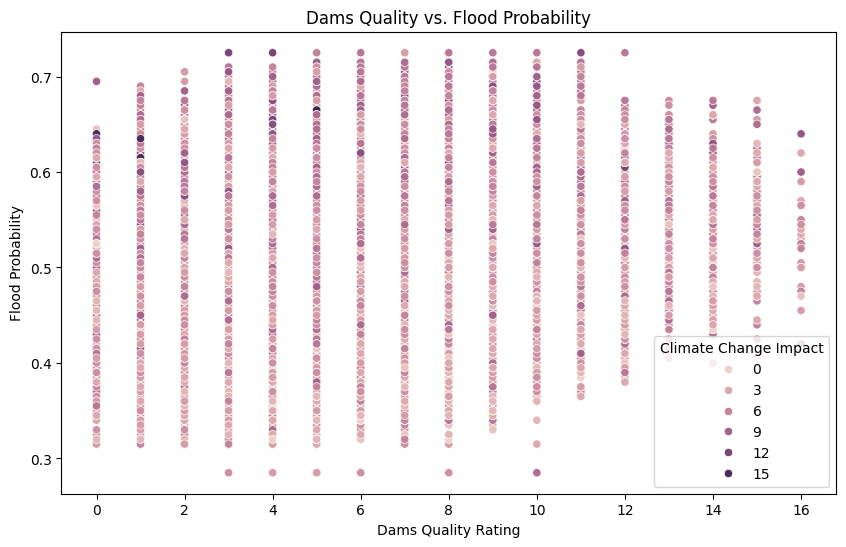

In [97]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=traind, x='DamsQuality', y='FloodProbability', hue='ClimateChange')
plt.title('Dams Quality vs. Flood Probability')
plt.xlabel('Dams Quality Rating')
plt.ylabel('Flood Probability')
plt.legend(title='Climate Change Impact')
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



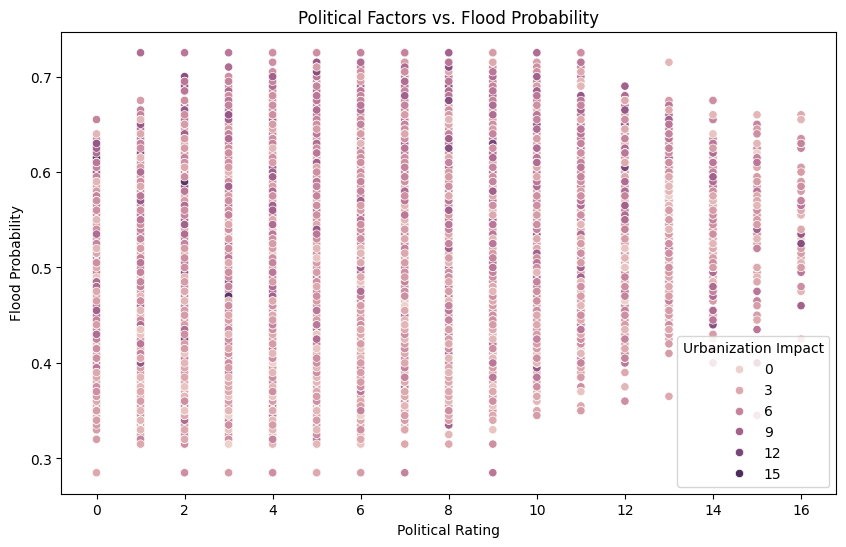

In [98]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=traind, x='PoliticalFactors', y='FloodProbability', hue='Deforestation')
plt.title('Political Factors vs. Flood Probability')
plt.xlabel('Political Rating')
plt.ylabel('Flood Probability')
plt.legend(title='Urbanization Impact')
plt.show()

# SPLIT DATA

In [99]:
x = traind.drop(columns=['id', 'FloodProbability'])
y = traind['FloodProbability']

In [100]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Predict

In [138]:
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# Visualization

Text(0, 0.5, 'Flood Probability Prediction')

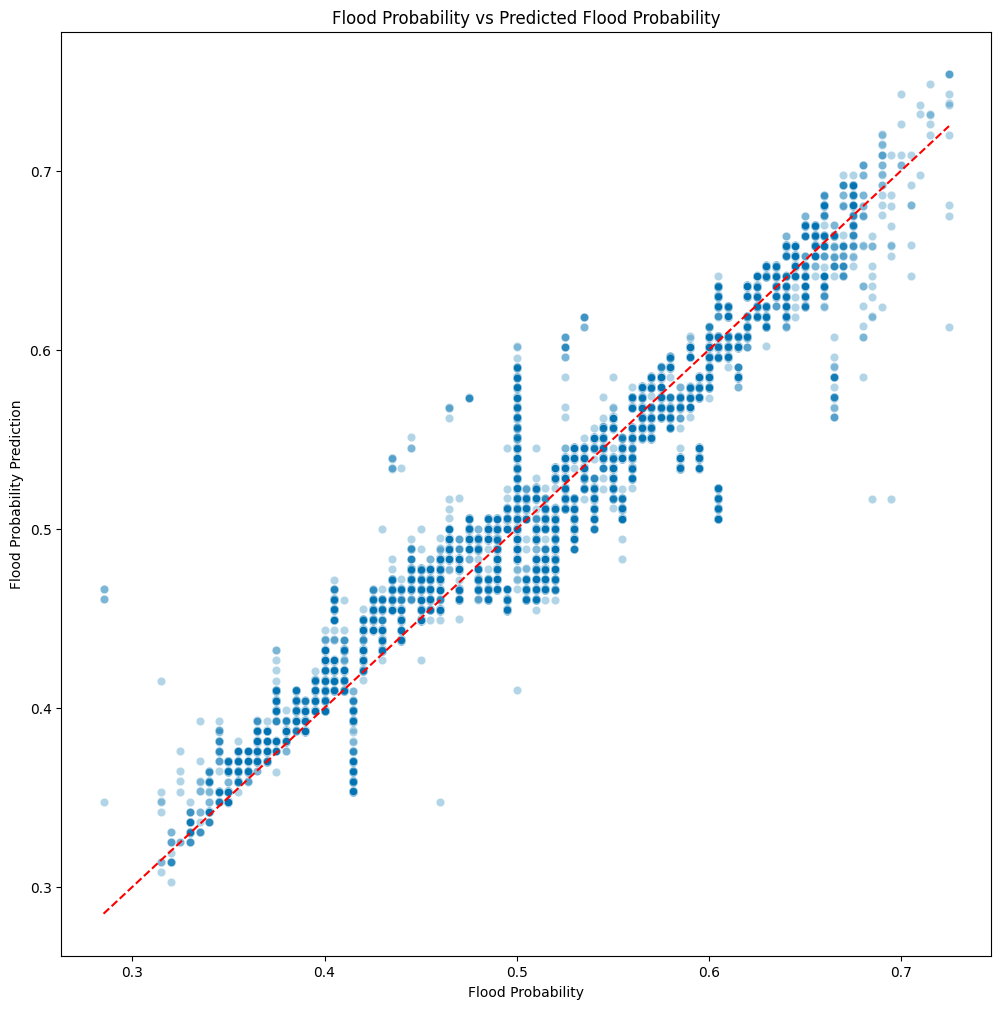

In [109]:
plt.figure(figsize=(12,12))

sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.title('Flood Probability vs Predicted Flood Probability')
plt.xlabel('Flood Probability')
plt.ylabel('Flood Probability Prediction')

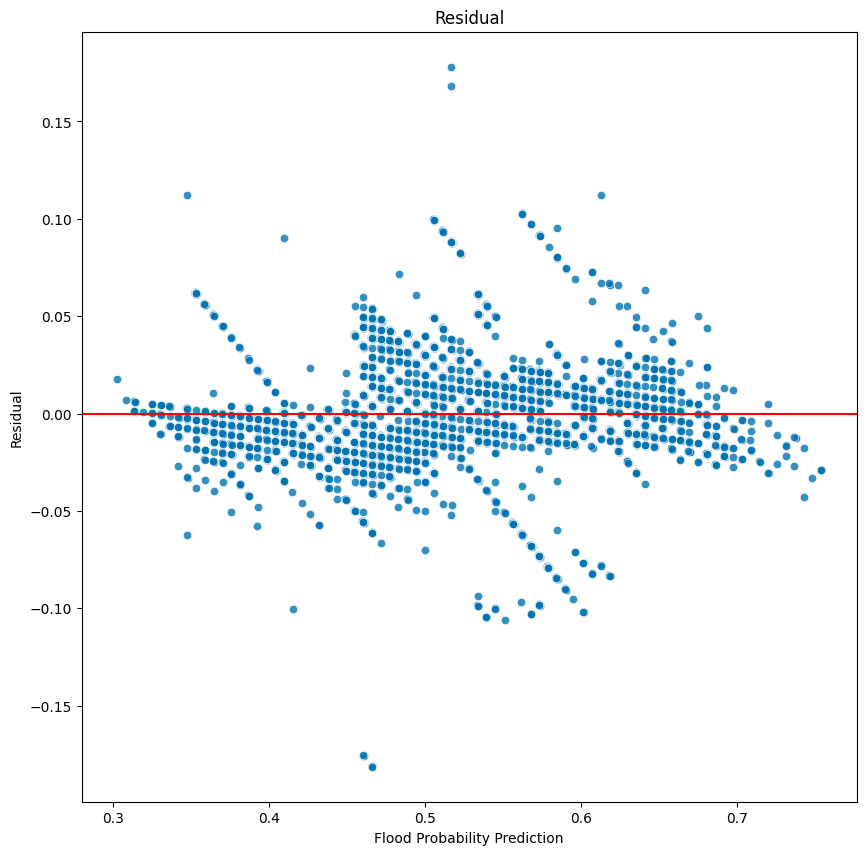

In [151]:
y_pred = model.predict(x_test)
residual_plt = y_test - y_pred

plt.figure(figsize=(10,10))

sns.scatterplot(x=y_pred, y=residual_plt, alpha=0.8)

plt.axhline(0, color='red')
plt.title('Residual')
plt.xlabel('Flood Probability Prediction')
plt.ylabel('Residual')
plt.show()

#R² Score

In [139]:
r2 = r2_score(y_test, y_pred)

print(f"R² Score: {r2}")

R² Score: 0.8448773362840329


# testing testing, things just got more interesting

In [148]:
sample_submission_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/sample_submission.csv?raw=true'
samplefile = pd.read_csv(sample_submission_url)


x_final = test_data.drop(columns=["id"])
y_pred = model.predict(x_final)

#creating the submission df
submission_df = pd.DataFrame({
    'id': samplefile['id'],
    'FloodProbability': y_pred
})

# saving submission df to csv
submission_df.to_csv("submission_file.csv", index=False)
print("Submission file created: submission_file.csv")

print(submission_df.head())

Submission file created: submission_file.csv
        id  FloodProbability
0  1117957          0.573613
1  1117958          0.455271
2  1117959          0.454752
3  1117960          0.466179
4  1117961          0.466085
